# Pymaceuticals Inc.
---

### Analysis

- From the results of our study, we can see that Capomulin and Ramincan were the most widely tested drug and Ketapril is the drug with the highest variance (and therefore standard deviation), idicating the most disparity in its data.  correlation coefficient's value of 0.84 indicates a strong, positive correlation between mouse weight and tumor volume.  As weight increases, the tumor volume is likely to increase, as well (for the drug Capomulin).

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_results=pd.merge(study_results,mouse_metadata,on="Mouse ID",how="outer")

# Display the data table for preview
combined_results.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
number_of_mice=len(combined_results["Mouse ID"].unique())
number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_ID=combined_results[combined_results.duplicated(["Mouse ID","Timepoint"])]
duplicate_ID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_ID_data=combined_results.loc[combined_results["Mouse ID"]=='g989']
duplicate_ID_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data=combined_results.loc[combined_results["Mouse ID"]!='g989']
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_number_of_mice=len(clean_data["Mouse ID"].unique())
clean_number_of_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_volume_mean=clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_volume_median=clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_volume_variance=clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_volume_stdev=clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_volume_SEM=clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stats_df=pd.DataFrame({"Mean Tumor Volume":tumor_volume_mean,"Median Tumor Volume":tumor_volume_median,"Tumor Volume Variance":tumor_volume_variance,"Tumor Volume Std. Dev":tumor_volume_stdev,"Tumor Volume Std. Err.":tumor_volume_SEM})
summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

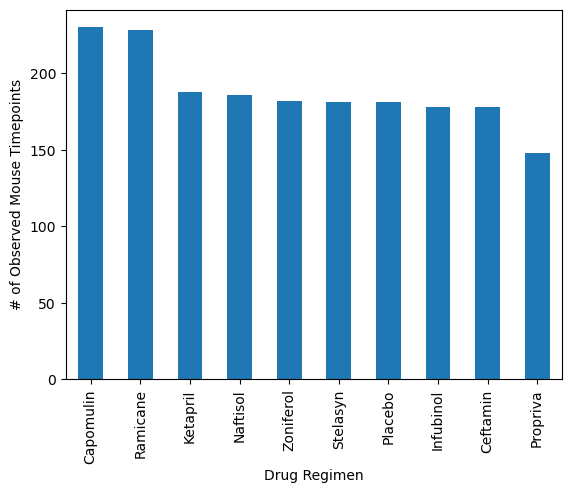

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Create a data frame with only Drug Regimen and Mouse ID
bar_chart_data=clean_data["Drug Regimen"].value_counts()
bar_chart_data_df=pd.DataFrame({"# of Mice":bar_chart_data})
drug_regimens=bar_chart_data_df.index
bar_chart_data_df.head()

#Create bar chart from reduced data set
bar_chart=bar_chart_data_df.plot(kind="bar",legend=False)
bar_chart.set_xlabel("Drug Regimen")
bar_chart.set_ylabel("# of Observed Mouse Timepoints")

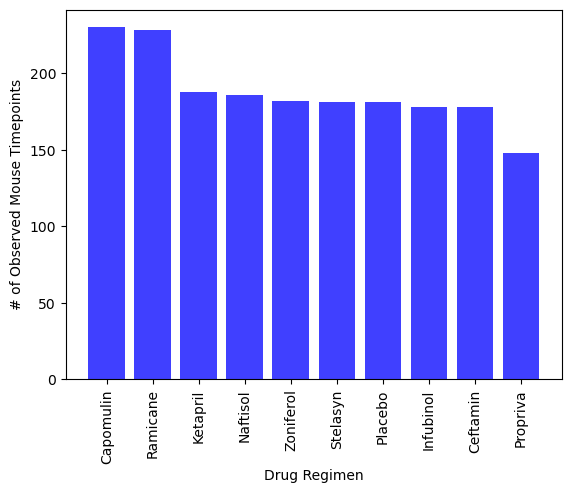

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#Set x-axis and tick locations
x_axis = np.arange(len(bar_chart_data_df))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels 
plt.bar(x_axis, bar_chart_data, color='b', alpha=0.75, align="center")
plt.xticks(x_axis,drug_regimens,rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

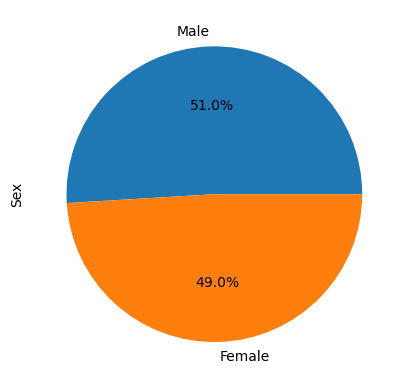

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts=clean_data["Sex"].value_counts()
pie_chart=sex_counts.plot(kind="pie",y=sex_counts,autopct="%1.1f%%")


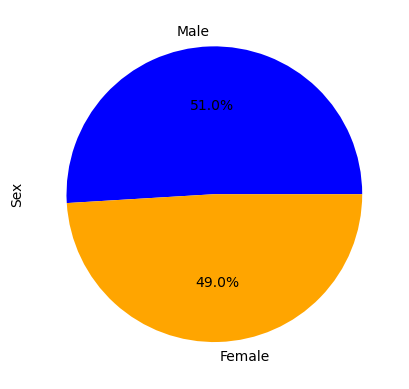

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Male","Female"]
colors=["Blue","Orange"]
plt.pie(sex_counts,labels=labels,colors=colors,autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint_df=clean_data.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_tumor_volume_df=pd.merge(greatest_timepoint_df,clean_data,how="left",on=["Mouse ID","Timepoint"])
max_tumor_volume_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    #Find rows that contain one of the four treatments and add corresponding tumor volume to list
    temp_df=max_tumor_volume_df.loc[max_tumor_volume_df["Drug Regimen"]==treatment]
    volume_values=temp_df["Tumor Volume (mm3)"]
    tumor_volume_data.append(volume_values)
        
    #Calculate quartiles and IQR
    quartiles=volume_values.quantile([.25,.5,.75])
    lowerq=quartiles[.25]
    upperq=quartiles[.75]
    iqr=upperq-lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers_high=volume_values.loc[volume_values>upper_bound]
    outliers_low=volume_values.loc[volume_values<lower_bound]
    
    print(f"{treatment}'s potential outliers: {outliers_low}  {outliers_high}")
       

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)  Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)  Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64  Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)  Series([], Name: Tumor Volume (mm3), dtype: float64)


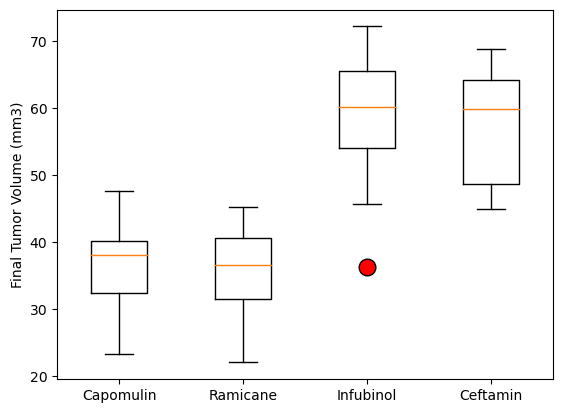

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume_data,labels=treatments,flierprops={"markerfacecolor":"red","markersize":12})
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

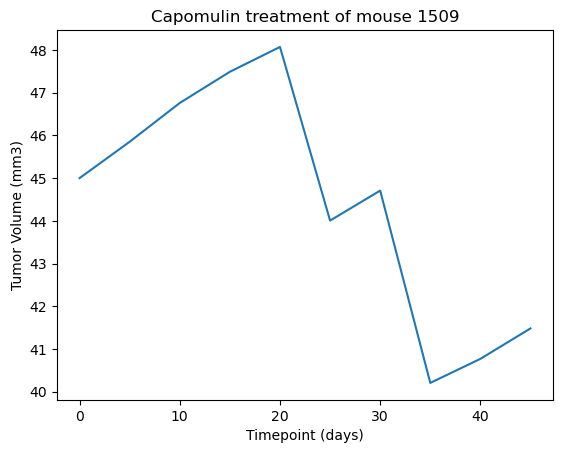

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_1509=(clean_data.loc[clean_data["Mouse ID"]=="l509",:])
x_axis=mouse_1509["Timepoint"]
y_axis=mouse_1509["Tumor Volume (mm3)"]
plt.plot(x_axis,y_axis)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse 1509")
plt.show()


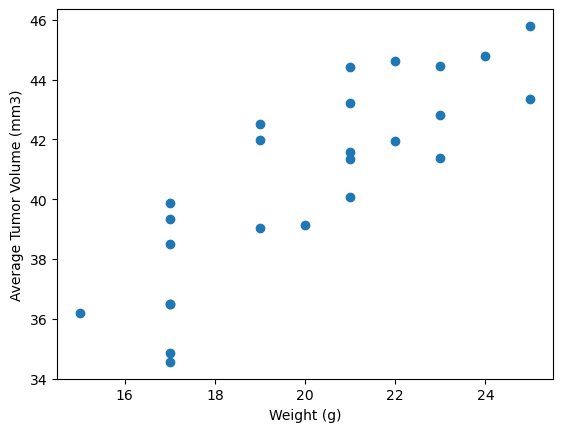

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data=clean_data.loc[clean_data['Drug Regimen']=="Capomulin",:]
#capomulin_data
x_axis_scatter=capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()
y_axis_scatter=capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
plt.scatter(x_axis_scatter,y_axis_scatter)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


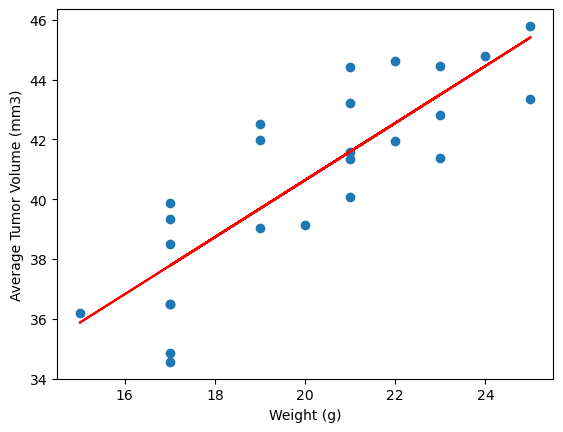

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
#Calculate correlation coefficient
correlation = st.pearsonr(x_axis_scatter,y_axis_scatter)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

#Calculate regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter, y_axis_scatter)
regress_values = x_axis_scatter * slope + intercept
plt.scatter(x_axis_scatter,y_axis_scatter)
plt.plot(x_axis_scatter,regress_values,"r")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
